In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
# creating DataFrame
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
# features names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
# print(boston.DESCR)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
y=boston.target

In [6]:
# adding target column to main DataFrame
df['Price']=y

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#  check for null
    df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [37]:
# for i in df.columns:
#     if (i!=['Price']):
#         plt.scatter(df[i],df['Price'])
#         plt.xlabel(i)
#         plt.ylabel('Price')
#         plt.show()

In [8]:
import seaborn as sns

In [57]:
# sns.pairplot(df)

<AxesSubplot:>

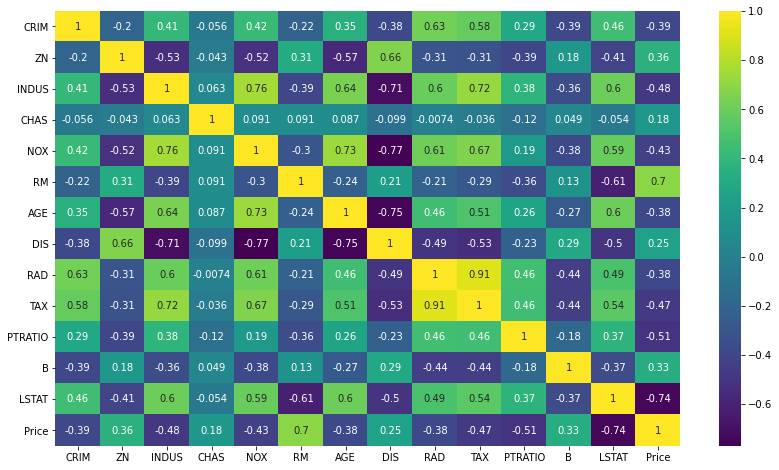

In [59]:
# checking for correlations
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
# to find out skewness in data

In [11]:
# rows=2
# columns=7
# fig,ax=plt.subplots(nrows=rows,ncols=columns,figsize=(14,8))
# col=df.columns
# index=0
# for i in range(rows):
#     for j in range(columns):
#         sns.distplot(df[col[index]],ax=ax[i][j])
#         index+=1
# plt.tight_layout()

In [16]:
# Seperating x and y for Machine learning algorithm
df.head()
x=df.drop('Price',axis=1)
y=df['Price']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss=StandardScaler()

In [17]:
# scalling X
X=ss.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg=LinearRegression()

In [23]:
# fitting to lenear regression 
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
#  predicting data
predict=reg.predict(X_test)

In [33]:
# coefficient per columns, Representing every one unit change in one column (keeping other column constant) price is changed by 
pd.DataFrame(reg.coef_,df.columns[0:-1],columns=['Coefficients'])

,Coefficients
CRIM,-0.760527
ZN,1.171793
INDUS,0.139459
CHAS,0.952620
NOX,-2.054607
RM,2.279679
AGE,0.337475
DIS,-2.964352
RAD,2.295406
TAX,-1.741625


In [77]:
# performance measure
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [35]:
# R2 score
score=r2_score(predict,y_test)
print(score)

0.5868420632663828


In [36]:
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)

In [37]:
print(mae)

3.8356963614189366


In [38]:
print(mse)

28.547585271468147


In [46]:
# Actual price VS prediction 
pd.DataFrame(predict,y_test,columns=['Predictions'])

,Predictions
Price,
50.0,40.111135
36.2,27.389719
11.7,16.647004
14.9,16.984756
30.8,31.129201
...,...
28.1,24.521066
20.7,26.346217
29.1,29.834238


In [51]:
#Saving our model 
import pickle

In [53]:
filename='linear_model_boston.pickle'
pickle.dump(reg,open(filename,'wb'))

In [54]:
load_model=pickle.load(open(filename,'rb') )

In [ ]:
load_model.predict([[300,110,5,5,5,10,1]])

In [78]:
#  Predicting housing price based on 13 features.
# Make sure to scale the data as we have scalled the data and then fit to linear regression model

In [76]:
load_model.predict(ss.fit_transform([['0.02731','0.0','7.07','0.0','0.469','6.421','78.9','4.9671','2.0','242.0','17.8'
                                     ,'396.9','9.14']]))

array([22.35546019])

In [81]:
# print(boston.DESCR)